### Datos de Marketing

Se propone un archivo CSV (`datos_marketing.csv`) de 2240 filas (clientes) con 28 columnas relacionadas con datos de marketing.

Más específicamente, las columnas son:

`id`: Identificador único del cliente (Considerada como la `primary-key`).

`Year_Birth`: Año de nacimiento del cliente.

`Education`: Nivel de educación del cliente.

`Marital_Status`: Estado civil del cliente.

`Income`: Ingreso familiar anual del cliente.

`Kidhome`: Número de niños en el hogar del cliente.

`Teenhome`: Número de adolescentes en el hogar del cliente.

`Dt_Customer`: Fecha de alta del cliente en la plataforma de compras.

`Recency`: Frescura del cliente, número de días desde la última compra del cliente,

`MntWines`: Cantidad gastada en vino en los últimos 2 años.

`MntMeatProducts`: Cantidad gastada en carne en los últimos 2 años.

`MntFishProducts`: Cantidad gastada en pescado en los últimos 2 años.

`MntSweetProducts`: Cantidad gastada en dulces en los últimos 2 años.

`MntSweetProducts`: Cantidad gastada en dulces en los últimos 2 años.

`MntSweetProducts`: Cantidad gastada en oro en los últimos 2 años.

`NumDealsPurchases`: Número de compras con descuentos.

`NumWebPurchases`: Número de compras realizadas a través de la web de la empresa.

`NumWebPurchases`: Número de compras realizadas a través del catálogo de la empresa.

`NumStorePurchases`: Número de compras realizadas en la tienda de la empresa.

`NumStorePurchases`: Número de visitas a la web de la empresa en el último mes.

`AcceptedCmp1`: 1 si el cliente ha aceptado la oferta en la primera campaña que se le ha realizado. En caso contrario 0.

`AcceptedCmp2`: 1 si el cliente ha aceptado la oferta en la segunda campaña que se le ha realizado. En caso contrario 0.

`AcceptedCmp3`: 1 si el cliente ha aceptado la oferta en la tercera campaña que se le ha realizado. En caso contrario 0.

`AcceptedCmp4`: 1 si el cliente ha aceptado la oferta en la cuarta campaña que se le ha realizado. En caso contrario 0.

`AcceptedCmp5`: 1 si el cliente ha aceptado la oferta en la quinta campaña que se le ha realizado. En caso contrario 0.

`Response`: 1 si el cliente ha aceptado la oferta en la última campaña que se le ha realizado. En caso contrario 0.

`Complain`: 1 si el cliente ha realizado alguna queja en los últimos 2 años. En caso contrario 0.

`Country`: Localización del cliente.

### Introducción

Vamos a ponernos en realizar un `roleplay` de analista de datos. El equipo de ventas y marketing nos ha pedido que las campañas de marketing recientes no han sido tan eficaces como se esperaba. Debemos analizar el conjunto de datos para comprender este problema y proponer soluciones basadas en datos.



### Tareas

¿Hay valores nulos o valores atípicos? ¿Cómo los disputará/manejará?        
¿Hay alguna variable que justifique las transformaciones?       
¿Hay alguna variable útil que pueda diseñar con los datos proporcionados?       
¿Notas algún patrón o anomalía en los datos?        
¿Puede representarlo graficamente? (Aquí os ayudaremos)         

#### 1. Importación de librerías

In [446]:
import pandas as pd
import numpy as py  
import os  
import re
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Lea el dataset

##### Solución

In [447]:
df=pd.read_csv("datos_marketing.csv")

#### 3. Use el comando `.info()` para ver información del `dataset`

##### Solución

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

#### 4. Use el comando `.head()` para ver las columas

##### Solución

In [449]:
pd.set_option('display.max_columns', None)                     #Al no ver todas las columnas, cambiamos la configuración de pandas para poder verlas todas

In [450]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


#### 5. Tratamiento de la columna `'income'`

Trate la columna:   

Eliminando el espacio del nombre de la columna. Puede usar la función `replace`.  
Quite el símbolo del dolar. Puede usar la función `replace`.  
Cambie la columna al tipo `float`. Puede usar la función `astype(...)` 

##### Solución

In [451]:
df.columns                                                                  #Aspecto original de las columnas

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [452]:
df.columns=df.columns.str.strip()                                      #Quitamos todos los espacios de los títulos y grabamos sobre el df
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [453]:
df["Income"]=df["Income"].replace({"\$":""},regex=True)         #Quitamos el símbolo de dólar, que es carácter especial en una expresión regular, por eso usamos "\$" y no solo el símbolo"
df["Income"]=df["Income"].replace({"\,":""},regex=True)                                                                 #Lo sustituimos por nada
                                                                #Lo sustituimos por nada
                                                                #"Regex=True", le indica al "replace", que el primer argumento es una expresión regular
              

In [454]:
df["Income"]=df["Income"].astype(float) 

#### 6. Imprima de nuevo el dataset con `.head()` y compruebe los resultados

##### Solución

In [455]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [456]:
df["Income"].dtype

dtype('float64')

##### Solución

#### 7. Empecemos mirando los valores nulos de las columnas.

Identifique el número de valores nulos en cada columna.

Use el comando `isnull()` y la combinación de `isnull()` y `sum()` para lograrlo.

##### Solución

In [457]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [458]:
df["Income"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Name: Income, Length: 2240, dtype: bool

#### 8. ¿Qué columna tiene valores nulos?

¿Cuántos valores nulos ha conseguido detectar? **`24`**

¿En qué columna/s? **`Todos ellos en la columna "Income"`**

A continuación use el siguiente código para representar la columna `'Income'` y trate de ver qué ocurre.

plt.figure(figsize=(16, 8))     
sns.histplot(datos['Income'])   
plt.title('Distribucion de la columna "Income"', size=25)   
plt.ylabel('Conteo');   
Mire en el Eje X, ¿qué identifica en la figura? ¿Ve los valores nulos?  **`"x" identifica los valores de ingresos y "y" el conteo de los valores. los valores nulos parecen ser los contados en la segunda columna empezando por la izquierda.`**

##### Solución

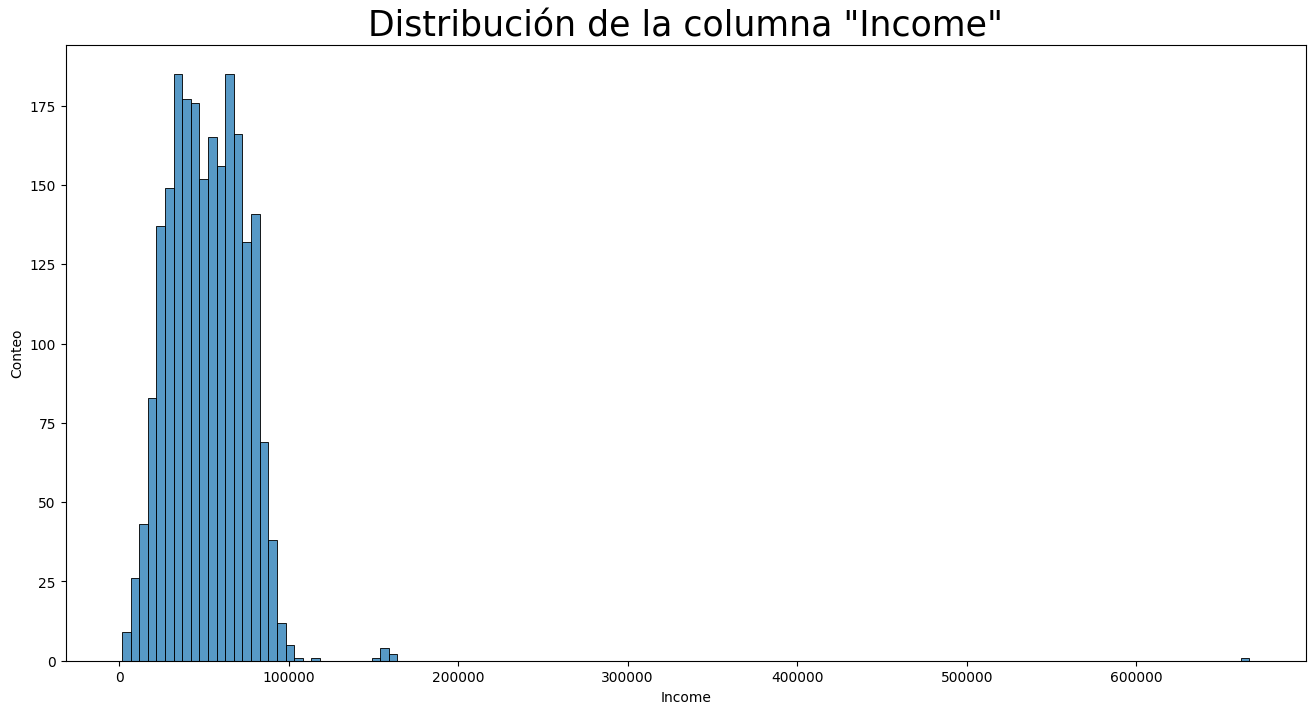

In [459]:
plt.figure(figsize=(16, 8))     
sns.histplot(df['Income'])   
plt.title('Distribución de la columna "Income"', size=25)   
plt.ylabel('Conteo'); 

##### 9. Rellene los valores nulos

Use la mediana de la columna para rellenar aquellos valores nulos.

La mediana puede ser calculada mediante `'.median()'`

##### Solución

In [460]:
df["Income"]=df["Income"].fillna(df["Income"].median())

In [461]:
df.isnull().sum()                                      #Comprobamos si se han sustituido correctamente

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

#### 10. ¿Requiere alguna columna de realizar una transformación?

Mire la columna `Dt_Customer`. Cambie el tipo de columna a `Datetime`.

Puede usar la función `to_datetime()`.

##### Solución

- Según df.info(), la columna es:     

        - 7   Dt_Customer          2240 non-null   object

In [462]:
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"])

In [463]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US


In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

#### 11. Otras tareas de ingeniería de datos que podemos hacer para facilitar la vida al equipo de ventas y marketing

Revise una lista de los nombres de columnas a continuación, a partir de los cuales podemos crear nuevas:

##### 11.1 Es posible crear una nueva columna con el número total de menores de edad en el hogar (nueva columna `'Dependents'`) a partir de la suma de `'Kidhome'` y `'Teenhome'`.

###### Solución

In [465]:
df["Dependents"]= df["Kidhome"]+df["Teenhome"]                              

In [466]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Dependents'],
      dtype='object')

##### 11.2 Es posible tener a mano el año de cuando el cliente compró por primera vez (nueva columna `'Year_Customer'`) partir de `'Dt_Customer'`.

###### Solución

In [467]:
duplicados = df['ID'].duplicated().sum()              #Al no haber IDs duplicadas, podemos extraer simplemente el año de la columna "Dt_Customer"
duplicados

0

In [468]:
df["Year_Customer"]= df["Dt_Customer"].dt.year          #Como el formato ya se cambió a "datetime", podemos usar "dt.year" para extraer el año de cada fecha de la columna "Dt_Customer"

In [469]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Dependents',
       'Year_Customer'],
      dtype='object')

##### 11.3 La cantidad total gastada (nueva columna `"TotalMnt"`) se puede crear a partir de la suma de todas las columnas que contienen la palabra clave `'Mnt'`.

###### Solución

In [476]:
columnas_con_mnt=df.filter(like="Mnt")                            #Filtramos primero las columnas que tengan "Mnt", 6 en total
columnas_con_mnt

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,189,104,379,111,189,218
1,464,5,64,7,0,37
2,134,11,59,15,2,30
3,10,0,1,0,0,0
4,6,16,24,11,0,34
...,...,...,...,...,...,...
2235,372,18,126,47,48,78
2236,5,10,13,3,8,16
2237,185,2,88,15,5,14
2238,267,38,701,149,165,63


In [487]:
df["TotalMnt"]=columnas_con_mnt.sum(axis=1)                    #Creamos la columna nueva rellenándola con la suma de los valores de las columnas con "Mnt". 
                                                               #Usando axis=1, indicamos que la suma se ha de hacer a lo largo de las columnas

In [481]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Dependents',
       'Year_Customer', 'TotalMnt'],
      dtype='object')

##### 11.4 Las compras totales (nueva columna `"TotalPurchases"`) se pueden diseñar a partir de la suma de todas las columnas que contienen la palabra clave `'Purchases'`.


###### Solución

In [489]:
columnas_con_purchases=df.filter(like="Purchases")                            #Filtramos primero las columnas que tengan "Purchases", 4 en total
columnas_con_purchases

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,1,4,4,6
1,1,7,3,7
2,1,3,2,5
3,1,1,0,2
4,2,3,1,2
...,...,...,...,...
2235,2,5,2,11
2236,1,1,0,3
2237,2,6,1,5
2238,1,5,4,10


In [490]:
df["TotalPurchases"]=columnas_con_purchases.sum(axis=1)

In [491]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Dependents',
       'Year_Customer', 'TotalMnt', 'TotalPurchases'],
      dtype='object')

In [493]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Year_Customer,TotalMnt,TotalPurchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,0,2014,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,0,2014,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,1,2014,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,2,2014,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,1,2014,91,8


##### 11.5 El número total de campañas aceptadas por clientes (nueva columna `'TotalCampaignsAcc'`) se puede diseñar a partir de la suma de todas las columnas que contienen las palabras clave `'Cmp'` y `'Response'` (significa que es la última campaña).

###### Solución

In [494]:
columnas_con_campaigns=df.filter(like="Cmp")                                              #Filtramos primero las columnas que tengan "Cmp", 5 en total
columnas_con_campaigns

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,0,0,0,0,0
1,0,0,0,0,1
2,0,0,0,0,0
3,0,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
2235,0,0,0,0,0
2236,0,0,0,0,0
2237,0,0,0,0,0
2238,0,0,0,0,0


In [495]:
df["TotalCampaignsAcc"]=columnas_con_campaigns.sum(axis=1)+df["Response"]             #En este caso, "Response" es una columna y por eso sumamos tamibén esto

In [496]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Dependents',
       'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc'],
      dtype='object')

In [497]:
df.head()                          #Comprobamos el aspecto de las 5 columnas creadas

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,0,2014,1190,15,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,0,2014,577,18,2
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,1,2014,251,11,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,2,2014,11,4,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,1,2014,91,8,2
